# 데이터 시각화

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

plt.rcParams["axes.unicode_minus"] = False # 마이너스 부호 때문에 한글이 깨질 수가 있어 주는 설정
rc("font", family="Malgun Gothic")
get_ipython().run_line_magic("matplotlib", "inline")

In [3]:
merge_data = pd.read_excel("./result_data/03_merge_data_result.xlsx")
merge_data.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


In [4]:
merge_data.set_index("구별", inplace=True)
merge_data.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


#### 🔰 pandas에서 plot 그리기

- pandas DataFrame은 데이터 변수에서 바로 plot() 함수를 사용할 수 있다.

- 데이터가 많을 경우 정렬한 후 그리는 것이 효과적일 때가 많다.

<Axes: xlabel='구별'>

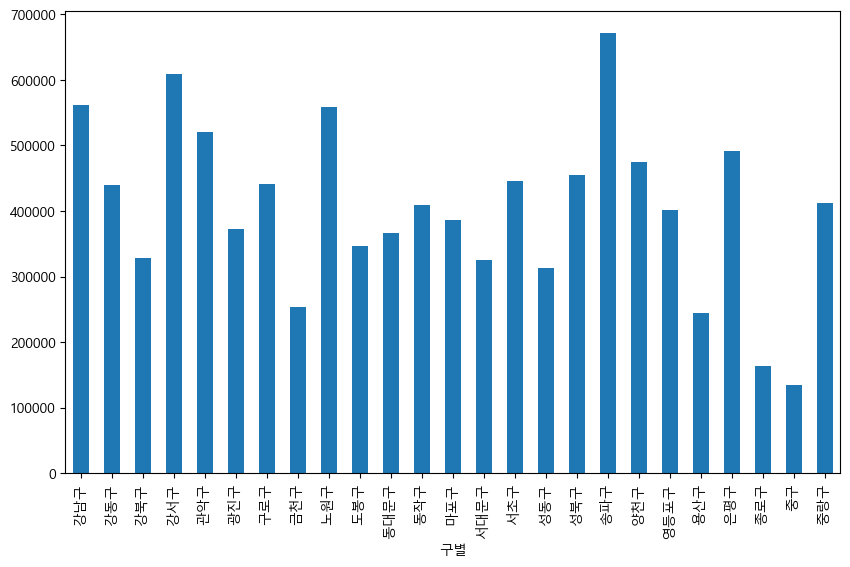

In [6]:
merge_data["인구수"].plot(kind="bar", figsize=(10, 6))

<Axes: ylabel='구별'>

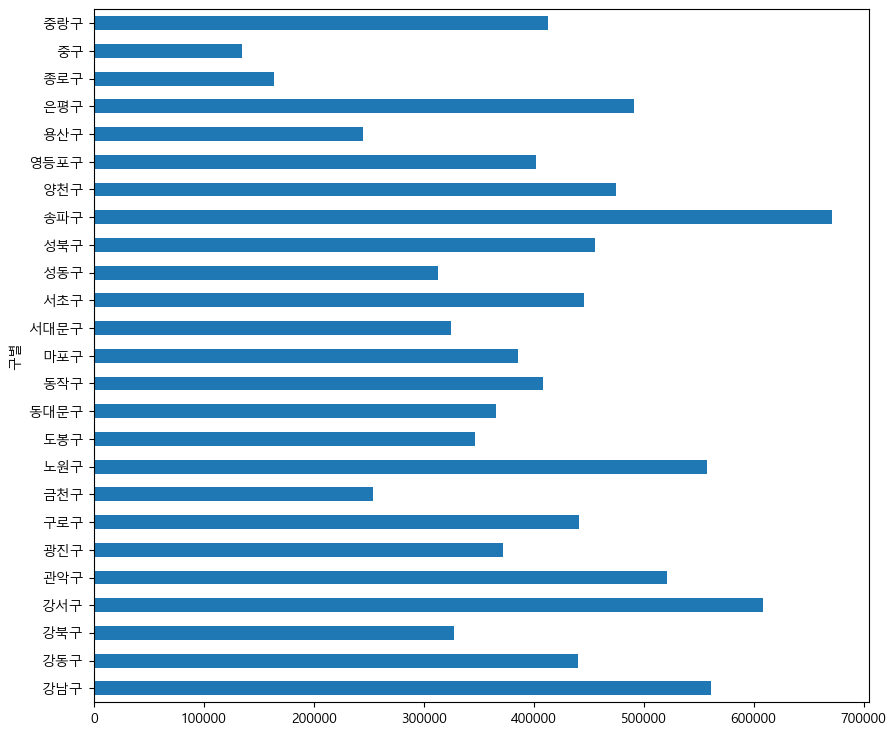

In [15]:
merge_data["인구수"].plot(kind="barh", figsize=(10, 9))

#### 🔰 "소계" 컬럼 시각화

<Axes: ylabel='구별'>

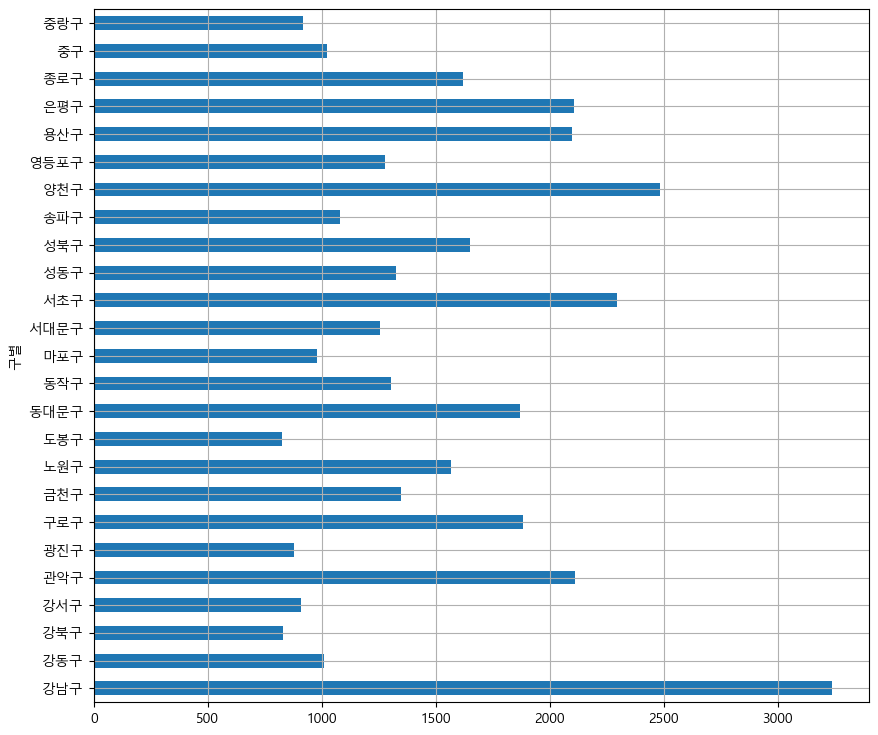

In [17]:
merge_data["소계"].plot(kind="barh", grid=True, figsize=(10, 9))

In [13]:
merge_data["소계"].sort_values(ascending=False)

구별
강남구     3238
양천구     2482
서초구     2297
관악구     2109
은평구     2108
용산구     2096
구로구     1884
동대문구    1870
성북구     1651
종로구     1619
노원구     1566
금천구     1348
성동구     1327
동작구     1302
영등포구    1277
서대문구    1254
송파구     1081
중구      1023
강동구     1010
마포구      980
중랑구      916
강서구      911
광진구      878
강북구      831
도봉구      825
Name: 소계, dtype: int64

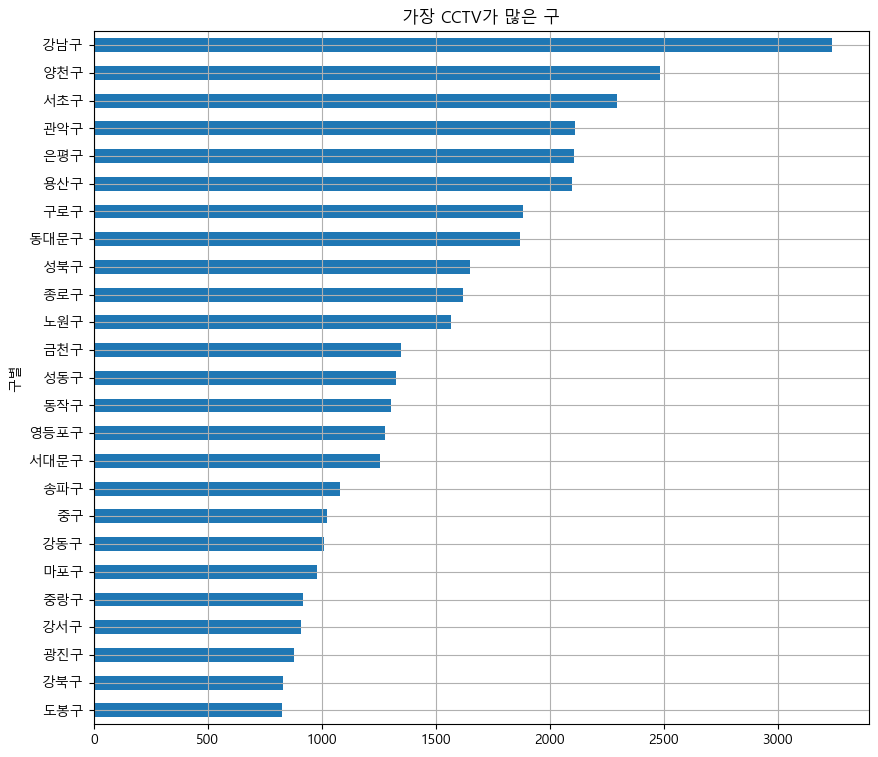

In [18]:
def drawGraph():
    merge_data["소계"].sort_values().plot(
		kind="barh", grid=True, title="가장 CCTV가 많은 구", figsize=(10, 9)
	)
drawGraph()

#### 🔰 "CCTV비율" 컬럼 시각화

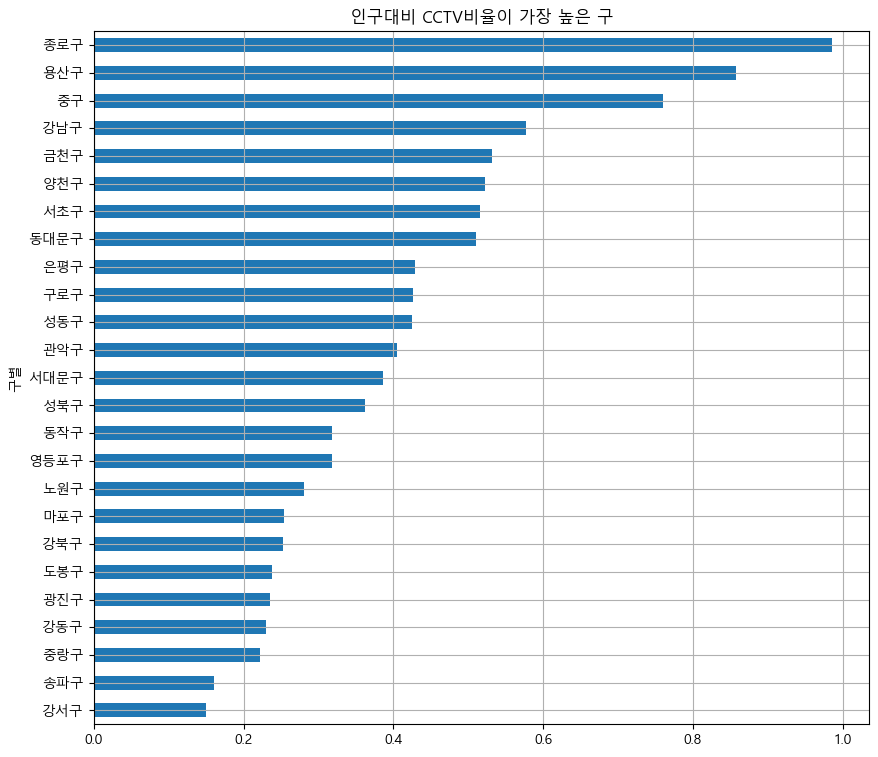

In [20]:
def drawGraph():
    merge_data["CCTV비율"].sort_values().plot(
		kind="barh", grid=True, title="인구대비 CCTV비율이 가장 높은 구", figsize=(10, 9)
	)
drawGraph()

#### 🔰 데이터의 경향(trend) 시각화

##### 1. 인구수와 소계 컬럼으로 scatter plot 그리기

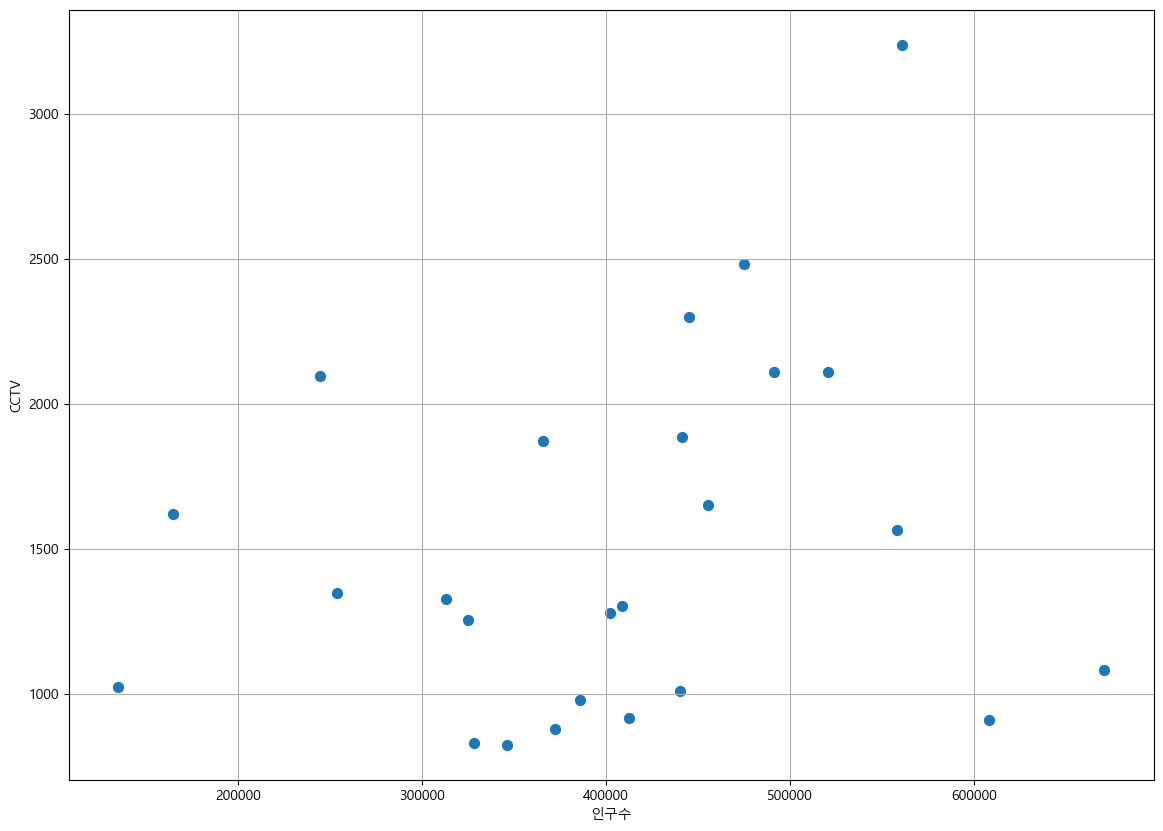

In [24]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(merge_data["인구수"], merge_data["소계"], s=50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid(True)
    plt.show()
    
drawGraph()

👆 인구가 증가할 수록 CCTV 개수가 증가하는 듯한 경향을 보인다.

##### 2. numpy를 이용해 1차 직선 만들기

- numpy가 제공하는 간단한 함수를 이용해 1차 직선(y=ax+b)을 만들어 그래프로 비교한다.

- np.polyfit() : 직선을 구성하기 위한 계수(기울기와 y절편)를 계산
- np.poly1d(): polyfit으로 찾은 계수로 파이썬에서 사용할 수 있는 함수로 만들어주는 기능

In [26]:
import numpy as np

In [27]:
pf1 = np.polyfit(merge_data["인구수"], merge_data["소계"], 1)
pf1

array([1.11155868e-03, 1.06515745e+03])

In [32]:
f1 = np.poly1d(pf1)
f1

poly1d([1.11155868e-03, 1.06515745e+03])

In [33]:
f1(400000)

1509.7809252413338

##### 3. 인구가 40만인 구에서 서울시의 전체 경향에 맞는 적당한 CCTV 수는?

- 경향선을 그리기 위한 X 데이터 생성 
- np.linspace(a, b, n): a부터 b까지 n개의 등간격 데이터 생성

In [34]:
fx = np.linspace(100000, 700000, 100) # 100,000과 700,000 사이에 100개의 수 생성
fx

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

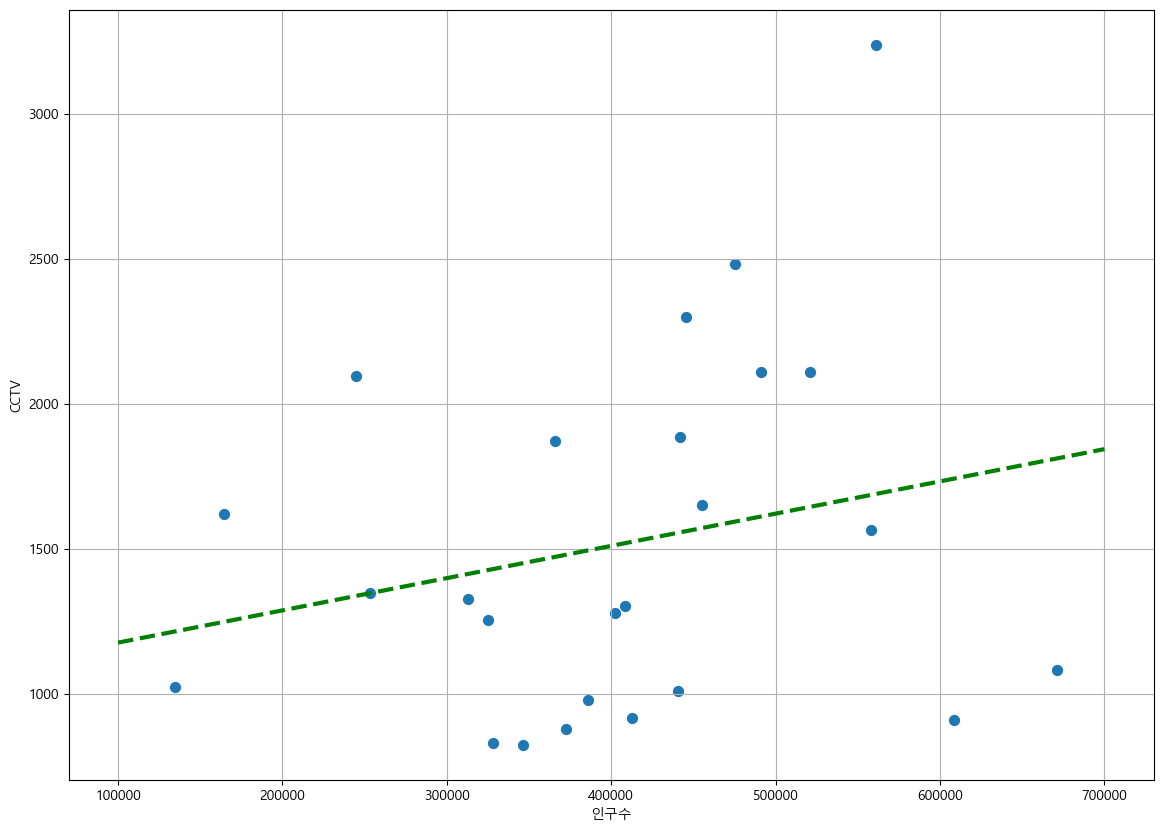

In [35]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(merge_data["인구수"], merge_data["소계"], s=50)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g") # ls(line style), lw(line width)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()
    
drawGraph()

#### 🔰 강조하고 싶은 데이터 시각화

**그래프 다듬기**

- 위에서 구한 경향(trend) 함수 f1을 활용해 오차를 만든다.
- 오차 = 실제 CCTV 개수 - 경향으로 예측한 CCTV 개수

In [36]:
merge_data["오차"] = merge_data["소계"] - f1(merge_data["인구수"])
merge_data.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358,-544.642322
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352,-598.750923
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854,464.799395


- 경향과 비교해서 데이터의 오차가 너무 나는 데이터를 계산

In [39]:
df_sort_desc = merge_data.sort_values(by="오차", ascending=False)
df_sort_asc = merge_data.sort_values(by="오차")

- 경향 대비 CCTV를 많이 가진 구

In [40]:
df_sort_desc.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130,1549.200326
양천구,2482,34.671731,475018,471154,3864,55234,0.813443,11.627770,0.522507,888.832166
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456,759.128697
서초구,2297,63.371266,445401,441102,4299,53205,0.965198,11.945415,0.515715,736.753199
은평구,2108,85.237258,491202,486794,4408,74559,0.897390,15.178888,0.429151,496.842700


- 경향 대비 CCTV를 적게 가진 구

In [41]:
df_sort_asc.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


**경향에서 벗어난 데이터 강조하기**

- 오차가 큰 데이터로 상위 5개, 하위 5개를 선별해 마커 옆에 특별히 구 이름을 명시한다.

- text() : 그래프에 글자를 그리는 함수
- plt.text(x, y, text, 설정)

In [43]:
from matplotlib.colors import ListedColormap

# colormap 을 사용자 정의(user define)로 세팅 
color_step = ["#e74c3c", "#2ecc71", "#95a9a6", "#2ecc71", "#3498db", "#3498db"]
my_cmap = ListedColormap(color_step)

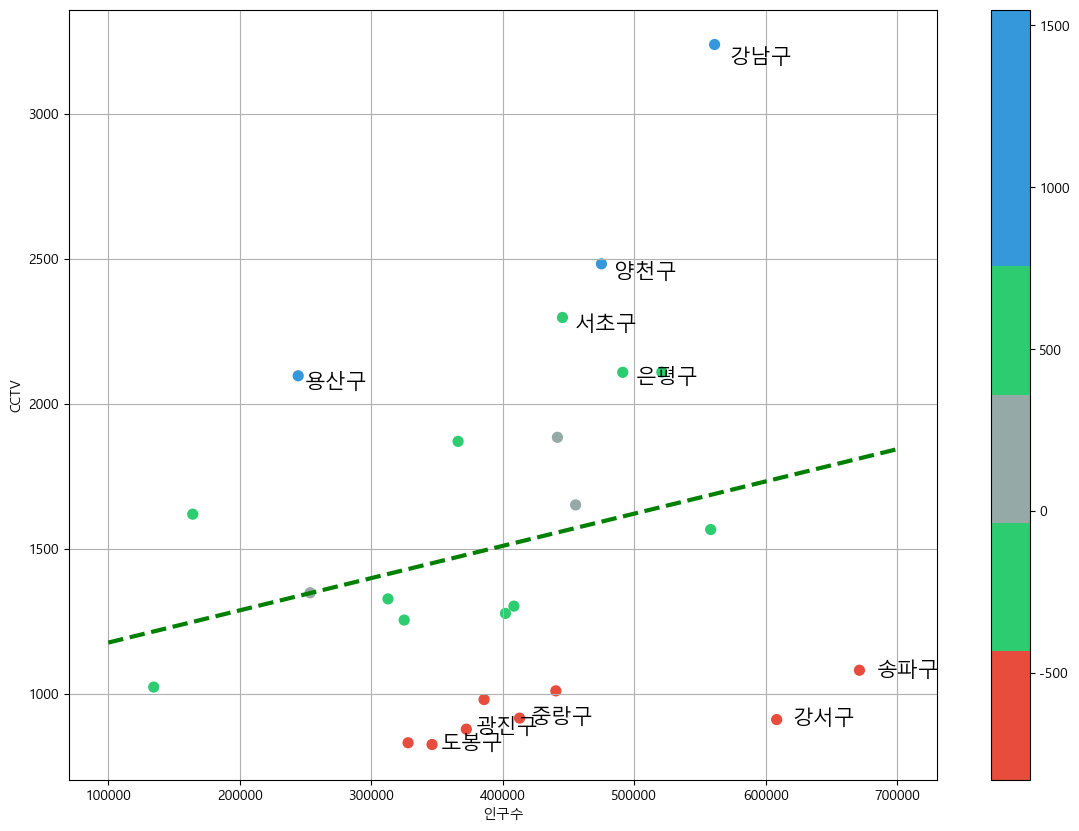

In [44]:
def drawGraph():
    plt.figure(figsize=(14, 10))
    plt.scatter(merge_data["인구수"], merge_data["소계"], s=50, c=merge_data["오차"], cmap=my_cmap)
    plt.plot(fx, f1(fx), ls="dashed", lw=3, color="g")
    
    for n in range(5):
        # 상위 5개 (text가 점을 가리지 않도록 살짝 우측(*1.02) 아래(*0.98)로 이동)
        plt.text(
            df_sort_desc["인구수"][n] * 1.02, # x 좌표
            df_sort_desc["소계"][n] * 0.98,  # y 좌표
            df_sort_desc.index[n], # title 
            fontsize=15,
        )    
        # 하위 5개 
        plt.text(
            df_sort_asc["인구수"][n] * 1.02, 
            df_sort_asc["소계"][n] * 0.98,
            df_sort_asc.index[n],
            fontsize=15
        )
        
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid()
    plt.show()
    
drawGraph()

In [45]:
merge_data.to_csv("./result_data/04_merge_data_result.csv", sep=',', encoding='utf-8')